# Prevendo valores de custos médicos

Hoje vamos utilizar a base de Insurance do Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance) para fazer algumas análises e tentar prever os custos médicos de cada paciente de acordo com os dados disponíveis nessa base.

Primeiro, vamos realizar uma pré análise dos dados para explorarmos com que tipo de dados estamos lidando e tentar identificar se existem valores nulos no dataset, os tipos de colunas e características dos pacientes.

------------------------------------------------------------------------------

Nesse contexto de leitura, análise e manipulação dos dados é muito comum você encontrar as bibliotecas Pandas e Numpy que são muito poderosas e possuem uma curva de aprendizado bem tranquila.

A biblioteca Pandas foi projetada para tornar a manipulação dos dados em Python extremamente simples e intuitiva. Ela oferece duas principais estruturas que são Series e DataFrame que são muito boas para manipular dados tabulares como Excel e CSV. Isso facilita muito a vida para lidar com grandes volumes de dados.

E a biblioteca Numpy? 

A Numpy foi projetada para realizar operações numéricas de maneira muito rápida e eficiente. Ela utiliza arrays (matrizes) de alta performance, que são muito mais eficientes do que as listas tradicionais do Python. Além disso, ela tem um grande número de funções matemáticas e estatísticas que facilitam a execução de cálculos complexos. Outro ponto importante é que que ela se integra muito bem com Pandas. 

In [43]:
import pandas as pd
import numpy as np

Depois de importar nossas bibliotecas, vamos carregar o arquivo de dados que vamos usar para treinar nosso modelo com o método read_csv() da Pandas. Também vamos exibir as primeiras 10 colunas do nosso dataset com o método head()

In [44]:
df = pd.read_csv('data/insurance2.csv')
print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


Caso você queira visualizar as últimas linhas do dataset e saber quantas linhas o seu dataset possui, é só utilizar o método tail()

In [96]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges,charges-binned
1328,23,0,24.225,2,0,3,22395.74424,Medium
1329,52,1,38.600,2,0,0,10325.20600,Low
1330,57,0,25.740,2,0,1,12629.16560,Low
1331,23,0,33.400,0,0,0,10795.93733,Low
1332,52,0,44.700,3,0,0,11411.68500,Low
1333,50,1,30.970,3,0,2,10600.54830,Low
1334,18,0,31.920,0,0,3,2205.98080,Low
1335,18,0,36.850,0,0,1,1629.83350,Low
1336,21,0,25.800,0,0,0,2007.94500,Low
1337,61,0,29.070,0,1,2,29141.36030,Medium


Outra forma de visualizar tanto o início e o fim do seu dataset no mesmo comando, é só utilizar o método 'info'.

In [46]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

Agora vamos dar uma olhada nos tipos das variáveis disponíveis no nosso dataset, será que já conseguimos notar algo importante aqui?

In [47]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

É muito importante avaliar se o nosso dataset possui valores nulos nas colunas, durante a criação do modelo isso pode atrapalhar o comportamento e precisamos lidar com esses valores nulos de diferentes formas pra cada tipo de coluna, aplicando uma técnica específica de normalização de dados.

Antes de normalizar os dados, precisamos lidar com valores nulos (ou faltantes). Valores nulos podem surgir por vários motivos, como dados ausentes ou erros na coleta de dados. Ignorar esses valores pode causar problemas na análise e no treinamento de modelos.

Tratar Valores Nulos: Existem várias maneiras de tratar valores nulos:
Remover Linhas/Colunas: Se poucos valores estão faltando, podemos simplesmente removê-los.
Preencher com Valores: Podemos substituir os valores nulos por uma média, mediana ou outro valor.

Em resumo,a normalização justa os dados para uma escala comum, melhorando a performance dos modelos.

In [48]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Esse código pega os valores de despesas médicas (charges), divide em três intervalos (bins) igualmente espaçados, dá nomes a esses intervalos (Low, Medium, High) e cria uma nova coluna charges-binned no DataFrame com essas categorias.

Objetivo: Categorizar despesas em baixa, média e alta.

Ferramentas: np.linspace para criar intervalos, pd.cut para categorizar.

Resultado: Nova coluna charges-binned com rótulos de categorias.

E é isso! De uma forma simples, categorizamos as despesas médicas para facilitar a análise. Legal, né?

In [50]:
bins = np.linspace(df['charges'].min(), df['charges'].max(), 4)
group_names = ['Low', 'Medium', 'High']
df['charges-binned'] = pd.cut(df['charges'], bins, labels=group_names, include_lowest=True)
print(df['charges-binned'].unique())


['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [51]:
print(df['charges-binned'].value_counts())

charges-binned
Low       1099
Medium     185
High        54
Name: count, dtype: int64


In [52]:
print(df.head())

   age     sex     bmi  children smoker     region      charges charges-binned
0   19  female  27.900         0    yes  southwest  16884.92400            Low
1   18    male  33.770         1     no  southeast   1725.55230            Low
2   28    male  33.000         3     no  southeast   4449.46200            Low
3   33    male  22.705         0     no  northwest  21984.47061            Low
4   32    male  28.880         0     no  northwest   3866.85520            Low


-----------------------------------------------------------

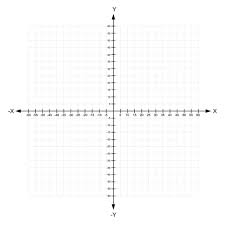

In [53]:
from IPython.display import display
from PIL import Image

img = Image.open('plano cartesiano.jpg')
img

In [54]:
import matplotlib.pyplot as plt

(array([1099.,  185.,   54.]),
 array([ 1121.8739 , 22004.72527, 42887.57664, 63770.42801]),
 <BarContainer object of 3 artists>)

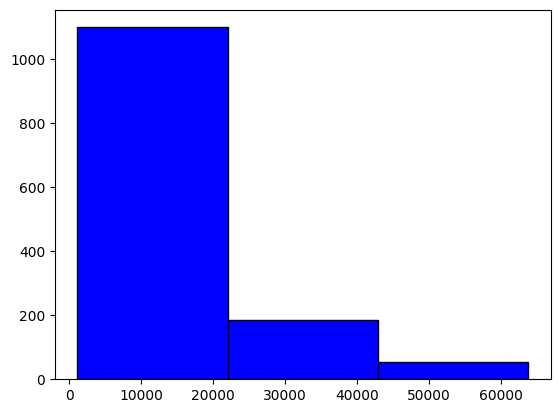

In [55]:
plt.hist(df['charges'], bins=3, color='blue', edgecolor='black')

--------------------------------------------------------------------

O que é um Boxplot?

Um boxplot é uma ferramenta visual fantástica para entender a distribuição de um conjunto de dados. Ele nos mostra a mediana, os quartis e os possíveis outliers (valores fora do padrão). Vamos ver isso no contexto das despesas médicas (charges).

Caixa (Box):

A parte central do boxplot é a caixa. Esta caixa representa os 50% do meio dos dados de Charges, o que chamamos de intervalo interquartil (IQR).
A linha dentro da caixa (linha laranja) é a mediana. Ela mostra que metade dos dados está abaixo desse valor e metade está acima.

Bigodes (Whiskers):

As linhas que se estendem a partir da caixa, chamadas de bigodes, mostram a extensão dos dados, excluindo os outliers. O bigode inferior se estende até o valor mais baixo que não é considerado um outlier, enquanto o bigode superior vai até o valor mais alto que não é um outlier.

Outliers:

Os pontos fora dos bigodes são outliers. Eles representam valores de Charges que são significativamente diferentes do restante dos dados.

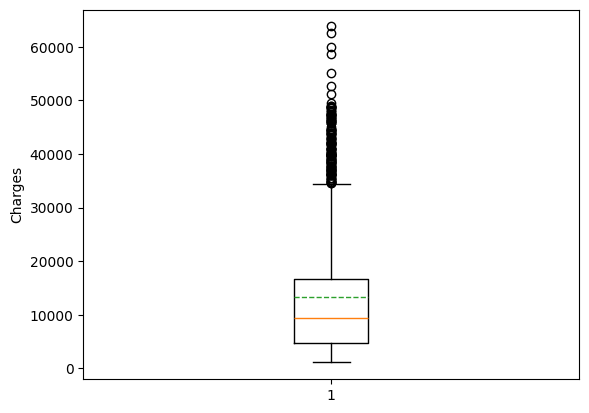

In [56]:
plt.boxplot(df['charges'], vert=True, meanline=True, showmeans=True)
plt.ylabel('Charges')
plt.show()

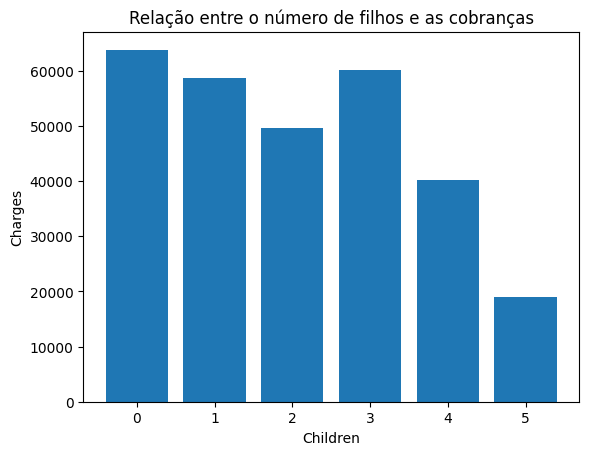

In [58]:
plt.bar(df['children'], df['charges'])
plt.title('Relação entre o número de filhos e as cobranças')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

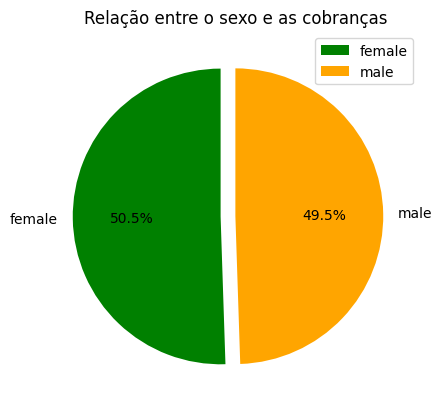

In [59]:
plt.pie(df['sex'].value_counts(), labels = df['sex'].unique(), autopct='%1.1f%%', startangle=90, colors=['green', 'orange'], explode=(0.1, 0))
plt.title('Relação entre o sexo e as cobranças')
plt.legend(df['sex'])
plt.show()
# Como assim idêntico? adicionar mais noise nos dados
# Tentar adicionar uma coluna de data

Por que usamos um Scatterplot?

Um scatterplot é excelente para visualizar a relação entre duas variáveis. Ele nos ajuda a ver se existe algum padrão, tendência, ou correlação entre elas.


Como interpretar um Scatterplot?

Correlação Positiva:
Se os pontos formam uma linha ascendente da esquerda para a direita, isso indica que à medida que os valores de uma variável aumentam, os valores da outra também aumentam.
Exemplo: Altura e peso. Pessoas mais altas tendem a pesar mais.

Correlação Negativa:
Se os pontos formam uma linha descendente da esquerda para a direita, isso indica que à medida que os valores de uma variável aumentam, os valores da outra diminuem.
Exemplo: Velocidade de um carro e tempo de viagem. Quanto mais rápido você dirige, menos tempo leva para chegar ao destino.

Sem Correlação:
Se os pontos estão espalhados aleatoriamente sem formar um padrão claro, isso indica que não há uma relação óbvia entre as duas variáveis.
Exemplo: Altura e número de livros lidos por mês. Não há uma relação clara entre essas duas coisas.

<Axes: xlabel='age', ylabel='charges'>

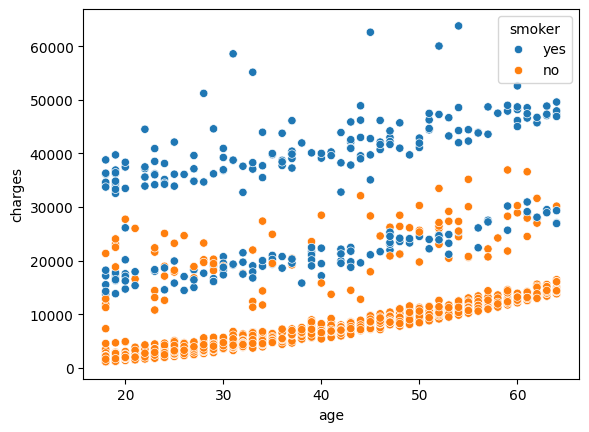

In [60]:
import seaborn as sns
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

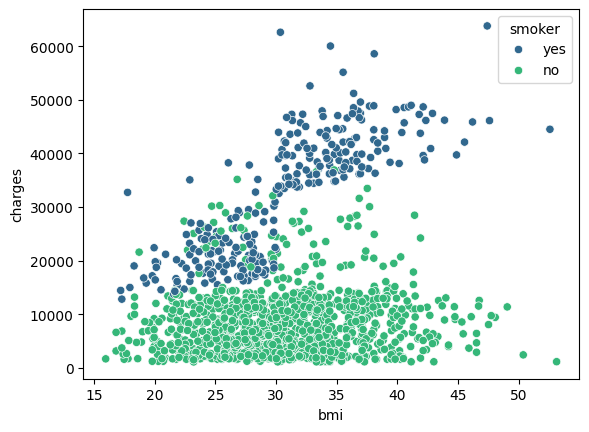

In [61]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='viridis')

O que é um Heatmap?

Um heatmap é um gráfico que usa cores para representar valores em uma matriz bidimensional. Cada célula no heatmap mostra o valor de uma variável em relação a outra, com cores que variam de acordo com a intensidade do valor.

Por que usamos um Heatmap?

Visualizar Correlações: Eles nos ajudam a ver rapidamente como diferentes variáveis estão correlacionadas.

Identificar Padrões: Podemos identificar padrões, tendências e anomalias em grandes conjuntos de dados.

Análises Comparativas: Facilita a comparação entre múltiplas variáveis ao mesmo tempo.

<Axes: >

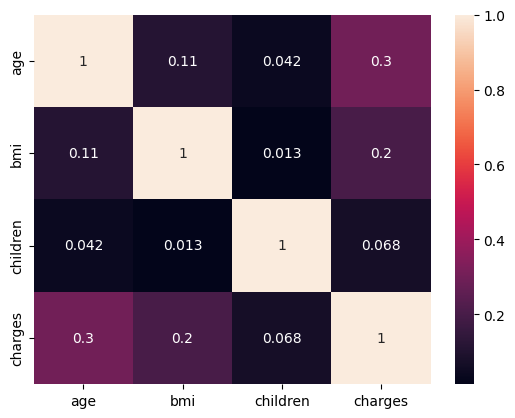

In [62]:
heatmap_data = df[['age', 'bmi', 'children', 'charges']]
corr = heatmap_data.corr()
sns.heatmap(corr, annot=True)

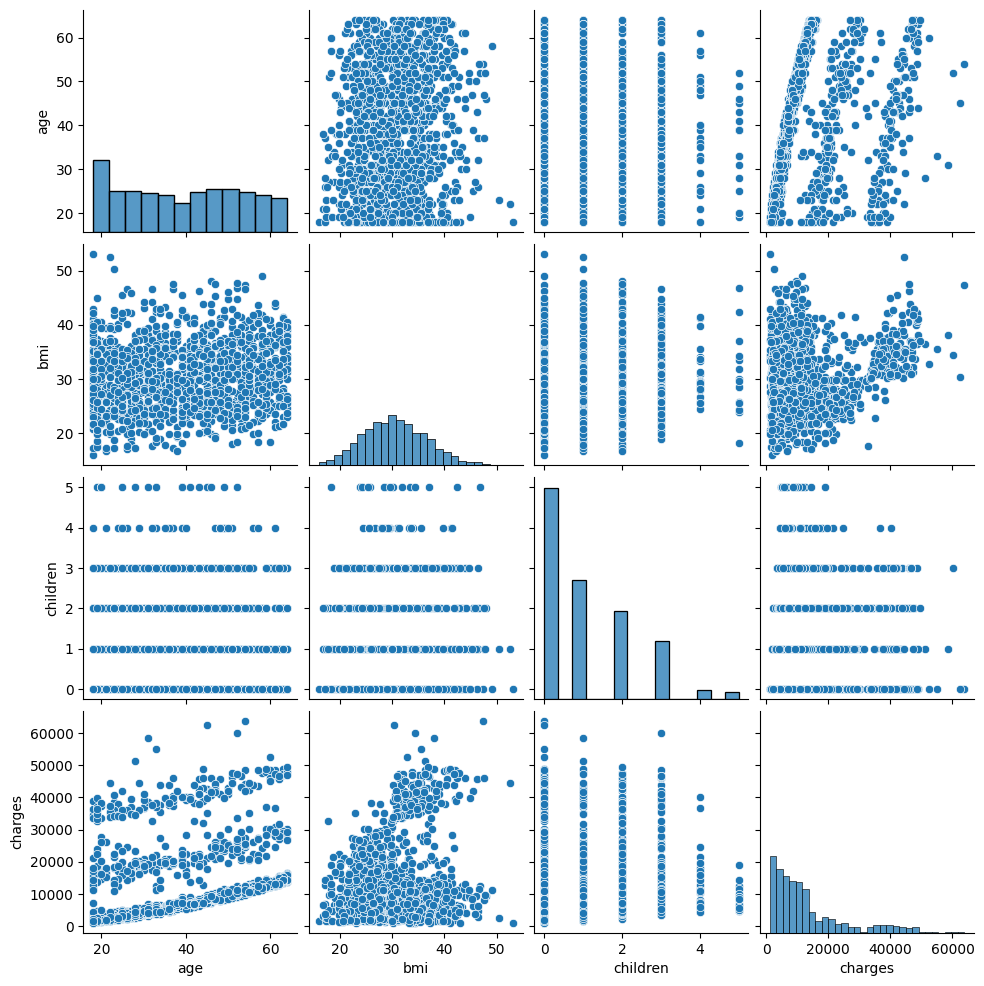

In [63]:
sns.pairplot(df)

In [64]:
df.duplicated().sum()

1

In [65]:
df.drop_duplicates(inplace=True)

O que estamos fazendo aqui?

Estamos transformando dados categóricos em dados numéricos. Isso é importante porque a maioria dos algoritmos de machine learning trabalha melhor com números do que com textos. Vamos dar uma olhada mais de perto em cada linha de código para entender o que está acontecendo.

In [66]:
df['sex'].replace({"female":0,"male":1}, inplace=True)
df['smoker'].replace({"no":0,"yes":1}, inplace=True)
df['region'].replace({"southwest":0,"southeast":1,"northwest":2,"northeast":3}, inplace=True)
df.head()

C:\Users\gabriel.bonpam\AppData\Local\Temp\ipykernel_17960\3778713168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({"female":0,"male":1}, inplace=True)
C:\Users\gabriel.bonpam\AppData\Local\Temp\ipykernel_17960\3778713168.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

,age,sex,bmi,children,smoker,region,charges,charges-binned
0,19,0,27.900,0,1,0,16884.92400,Low
1,18,1,33.770,1,0,1,1725.55230,Low
2,28,1,33.000,3,0,1,4449.46200,Low
3,33,1,22.705,0,0,2,21984.47061,Low
4,32,1,28.880,0,0,2,3866.85520,Low


In [67]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [68]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [69]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

------------------------------------------------------------------------------------------------------------

# Trabalhando com o Modelo de Regressão Linear

A seguir nós vamos importar o método 'train_test_split' da biblioteca 'sklearn'. Essa função é utilizada na divisão de datasets em duas partes, treino e teste.

Nós vamos dividir o dataset de teste em 0.2 que significa que vamos aplicar 20% de dos dados para teste e vamos utilizar 80% desses dados para treinar o nosso modelo. Já o parâmetro random_state está configurado como 42, esse parâmetro é utilizado para inicializar o gerador de números aleatórios que vai dividir esses dados entre índices de treino e teste. Ao configurarmos o Random State com um valor inteiro torna o output mais deterministico, ou seja, a divisão sempre será a mesma toda vez que rodarmos esse código Python.




In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

Por que usamos o MinMaxScaler?

Em ciência de dados, muitas vezes trabalhamos com conjuntos de dados que contêm valores muito variados. Por exemplo, imagine que estamos analisando dados de um conjunto de alunos, onde temos as idades variando entre 18 e 30 anos e as notas em uma escala de 0 a 100. Esses valores estão em escalas muito diferentes, e isso pode ser um problema para muitos algoritmos de aprendizado de máquina, como regressão linear ou redes neurais.
O MinMaxScaler resolve esse problema ao transformar todos os valores para que fiquem em uma faixa comum, facilitando a comparação e o processamento dos dados pelos algoritmos.


In [71]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

A seguir vamos aplicar a regressão linear nos nossos dados.

Primeiro vamos importar o nosso modelo de regressão, dividir nossos dados entre treino e teste, com test size de 80% e com o gerador aleatório 'random_state' igual a 11.

Depois nós instânciamos o nosso modelo e aplicamos o método fit para treinar o nosso modelo com os dados que nós estamos passando para ele. Quando você cham o método fit() com os seus dados como argumento, o modelo aprende a melhor linha que da match com os seus dados. Especificamente ele cálcula os valors ótimos dos pesos e viéses com uma equação que minimiza a soma dos quadrados dos resíduos dos dados, que basicamente é a diferença entre o valor real e o valor predito. 

In [ ]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=11)

reg = LinearRegression()
reg.fit(x_train, y_train)



LinearRegression()

O que é o R² Score?


O R² Score (ou Coeficiente de Determinação) é uma métrica que usamos para avaliar a performance de um modelo de regressão. Ele nos diz quão bem os nossos dados se ajustam ao modelo.
Como o R² Score Funciona?
O R² Score varia entre 0 e 1:
•	0: O modelo não explica nenhuma variação nos dados. É como se o modelo fosse inútil.
•	1: O modelo explica toda a variação nos dados. Isso significa que o modelo é perfeito (o que raramente acontece).


O que é o Cross Validation Score?

O Cross Validation Score é uma técnica que usamos para avaliar a performance de um modelo de machine learning de forma mais robusta. A ideia principal é dividir nossos dados em várias partes para garantir que o modelo funcione bem em diferentes cenários.


Como Funciona a Validação Cruzada?

O processo mais comum é chamado de k-fold cross validation. Aqui está como ele funciona:
1.	Divisão dos Dados: Dividimos nossos dados em k partes (ou "folds"). Por exemplo, se k = 5, dividimos nossos dados em 5 partes iguais.
2.	Treinamento e Teste: Treinamos o modelo em k-1 partes e testamos na parte restante. Fazemos isso k vezes, cada vez usando uma parte diferente como teste e as outras como treinamento.
3.	Média dos Resultados: Calculamos a métrica de performance (por exemplo, R² Score) para cada um dos k testes e tiramos a média desses valores. Isso nos dá o Cross Validation Score.
Por que Usar Validação Cruzada?
A validação cruzada nos ajuda a evitar o overfitting, que é quando nosso modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados. Ao testar o modelo em diferentes partes dos dados, garantimos que ele funcione bem em diversos cenários.


Resultados do modelo:

Train R2:  0.676502860152622

Test R2:  0.6706648368578538

CV score: 0.7140279835905625


In [73]:
ŷ_train = reg.predict(x_train)

from sklearn.metrics import r2_score
print('Train R2: ', r2_score(ŷ_train, y_train))
      
ŷ_test = reg.predict(x_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

from sklearn.model_selection import cross_val_score
print('CV score:', cross_val_score(reg, x_train, y_train, cv=5).mean()) 

Train R2:  0.676502860152622
Test R2:  0.6706648368578538
CV score: 0.7140279835905625


In [74]:
error = ŷ_test - y_test

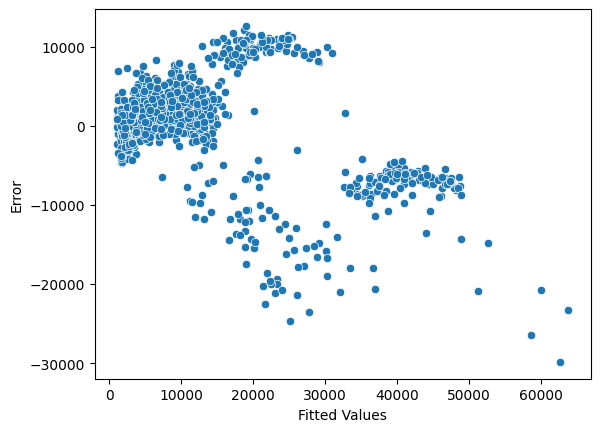

In [76]:
sns.scatterplot(x=y_test, y=error)
plt.xlabel('Fitted Values')
plt.ylabel('Error')
plt.show()


Esse é um histograma dos resíduos (diferenças entre os valores observados e os valores preditos) de um modelo de regressão linear. Vamos analisar e tirar alguns insights desse gráfico.


Eixo X (charges): Representa os resíduos, que são as diferenças entre os valores reais e os valores preditos pelo modelo.
Eixo Y (Count): Representa a contagem de ocorrências dos resíduos em cada intervalo.
Curva de Densidade: Sobre o histograma, há uma curva de densidade que ajuda a visualizar a distribuição dos resíduos.

A maioria dos resíduos está concentrada em torno de zero, o que é uma boa indicação. Idealmente, os resíduos devem estar distribuídos de maneira simétrica em torno de zero, o que sugere que o modelo não está sistematicamente subestimando ou superestimando os valores.

A distribuição dos resíduos parece apresentar alguma assimetria. Há um número considerável de resíduos negativos extremos (à esquerda) e também alguns positivos extremos (à direita). Isso sugere que o modelo pode estar subestimando ou superestimando alguns valores de forma consistente, o que pode indicar a presença de outliers ou de uma estrutura nos dados que o modelo linear não capturou bem.


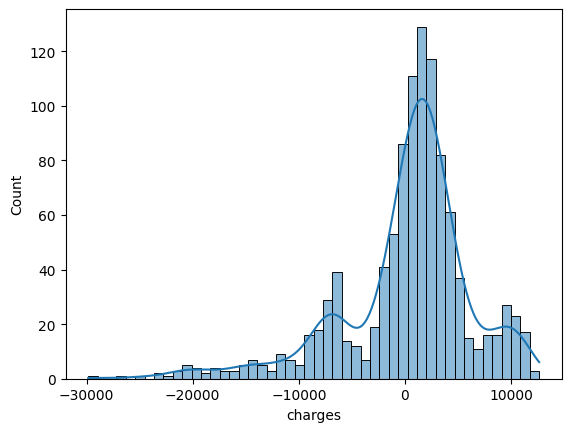

In [77]:
sns.histplot(error, kde = True)
plt.show()

Descrição do Gráfico

Eixo X (Fitted Values): Valores ajustados ou preditos pelo modelo de regressão linear.
Eixo Y (Error): Resíduos, que são as diferenças entre os valores observados e os valores preditos pelo modelo.
Linha Vermelha: Representa o eixo dos resíduos iguais a zero. Idealmente, os resíduos devem estar distribuídos aleatoriamente em torno desta linha.

Os resíduos não estão distribuídos aleatoriamente em torno da linha vermelha. Em vez disso, vemos padrões distintos que sugerem que o modelo de regressão linear não está capturando bem a estrutura dos dados.

A presença de "clusters" (agrupamentos) em diferentes regiões dos valores ajustados sugere que há variáveis ou interações não capturadas pelo modelo.


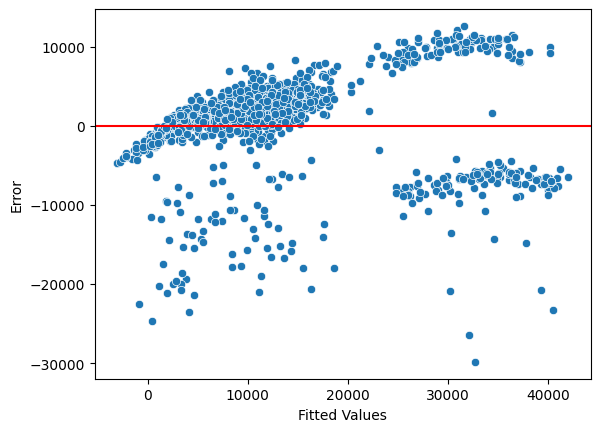

In [78]:
sns.scatterplot(x=ŷ_test, y=error)
plt.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Error')
plt.show()

O que é a Tabela de OLS Regression Results?

Quando realizamos uma regressão linear, queremos entender como uma variável depende de outra(s) variável(is). O "OLS" significa "Ordinary Least Squares" (Mínimos Quadrados Ordinários), que é um método para encontrar a melhor linha que descreve a relação entre as variáveis.
A tabela OLS Regression Results nos dá uma visão detalhada de como as variáveis independentes estão relacionadas com a variável dependente. Entender esses componentes nos ajuda a interpretar e validar nossos modelos de regressão.


In [79]:
import statsmodels.formula.api as smf
model = smf.ols('y~x', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.0
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        21:03:48   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.287e+04   1013.992    -12.696      0.000   -1.49e+04   -1.09e+04
x[0]         257.2032     11.899     21.616      0.000     233.861     280.546
x[1]        -129.4009    333.059     -0.389      0.698    -782.779     523.978
x[2]         332.5957     27.733     11.993      0.000     278.191     387.000
x[3]         478.7717    137.732      3.476      0.001     208.576     748.967
x[4]        2.382e+04    412.051     57.806      0.000     2.3e+04    2.46e+04
x[5]         354.0097    151.995      2.329      0.020      55.834     652.185
==============================================================================
Omnibus:                      298.466   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.712
Skew:                           1.206   Prob(JB):                    2.84e-155
Kurtosis:                       5.637   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Hyper Parameter Tuning

train_r2 =[]
test_r2 = []

for i in range(2,11):
    from sklearn.preprocessing import PolynomialFeatures
    poly_converter = PolynomialFeatures(degree=i)
    x_train_poly = pd.DataFrame(poly_converter.fit_transform(x_train))

    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(x_train_poly, y_train)

    ŷ_train = reg.predict(x_train_poly)
    train_r2.append(r2_score(ŷ_train, y_train))

    ŷ_test = reg.predict(poly_converter.transform(x_test))
    test_r2.append(r2_score(ŷ_test, y_test))

In [81]:
train_r2

[0.8259448722334349,
 0.8539910386983266,
 0.9053720203012535,
 0.9897831517316885,
 0.999999999804842,
 0.9999999999999865,
 0.9999999999997423,
 0.9999999999993135,
 0.999999999999999]

In [82]:
test_r2

[0.7892814162223611,
 0.747230529912632,
 0.20489468991112303,
 -0.010467146046001963,
 -0.004145770194724507,
 -0.00038336221574808427,
 -0.002797900044329893,
 -0.00205874864881217,
 -0.0016217459155072333]

Polynomial Features 

É um transformador fornecido pela biblioteca scikit-learn em Python. Ele é usado para gerar recursos polinomiais e de interação a partir dos recursos originais. Isso pode ser particularmente útil para modelos lineares, permitindo que eles ajustem relacionamentos mais complexos e não lineares.

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
polynomial_converter = PolynomialFeatures(degree=2)
x_train_poly = pd.DataFrame(polynomial_converter.fit_transform(x_train))

from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x_train_poly, y_train)

print('Coefficient: ', reg1.coef_)
print('Intercept: ', reg1.intercept_)

Coefficient:  [-1.65391347e+14  3.87640678e+02  1.66927137e+03  5.23411684e-01
  5.59168370e+02 -1.09674277e+04  2.03790973e+02 -1.42051542e+00
  2.97160132e+01  2.95963610e+00 -1.46936079e+00 -1.44479634e+02
 -2.84088347e+01  1.66927137e+03 -1.14534765e+02 -5.51271021e+01
  1.77106392e+02 -1.37704752e+03 -4.16901227e+00  5.06708201e+01
  1.66859879e+03  1.01064089e+02 -5.66213726e+02  1.00329040e+02
  4.61154711e+02 -1.09674277e+04 -4.21300895e+02 -4.48280700e+02]
Intercept:  165391347202514.1


Resultados do modelo após aplicar o Hyper Parameter Tuning

Train R2:  0.8259448722334349

Test R2:  0.7892814162223611

CV score:  0.7471285330088384

In [85]:
ŷ_train = reg1.predict(x_train_poly)
print('Train R2: ', r2_score(ŷ_train, y_train))

ŷ_test = reg1.predict(polynomial_converter.fit_transform(x_test))
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV score: ', cross_val_score(reg1, x, y, cv=5).mean())

Train R2:  0.8259448722334349
Test R2:  0.7892814162223611
CV score:  0.7471285330088384


------------------------------------------------------------------------------------

# Regularização de Lasso (Least Absolute Shrinkage and Selection Operator) 

É um tipo de regressão linear que inclui uma penalidade igual ao valor absoluto da magnitude dos coeficientes. É utilizada para seleção de características e para evitar overfitting, restringindo os coeficientes.

In [86]:
# Lasso Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

estimator = Lasso()

param_grid = {'alpha':[0.1,0.5,1,7,50,60]}

model = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')

model.fit(x_train, y_train)

model.best_params_

{'alpha': 60}

In [87]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=60)
lasso.fit(x_train, y_train)

print('Coefficient:', lasso.coef_)
print('Intercept: ', lasso.intercept_)

Coefficient: [3.01469849e+02 1.71305157e+01 3.10554176e+02 9.36392317e+02
 2.31898236e+04 1.57687708e+02]
Intercept:  -13943.54738464997


In [88]:
ŷ_train =lasso.predict(x_train)
print('Train R2', r2_score(ŷ_train, y_train))

ŷ_test = lasso.predict(x_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV score', cross_val_score(lasso, x, y, cv=5).mean())

Train R2 0.6670317270798882
Test R2:  0.6612206809486474
CV score 0.7472657743312568


---------------------------------------------------------------------------------------

# Ridge Regression

É um tipo de regressão linear que inclui um termo de regularização baseado na soma dos quadrados dos coeficientes. Ao contrário do Lasso, o Ridge não resulta em soluções esparsas, ou seja, ele não zera coeficientes, mas reduz a magnitude dos coeficientes para mitigar o overfitting e lidar com multicolinearidade.

In [89]:
from sklearn.linear_model import Ridge

estimator = Ridge()

param_grid = {'alpha':list(range(1,100))}

model = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')

model.fit(x_train, y_train)

model.best_params_

{'alpha': 2}

In [90]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)

print('Coefficient: ', ridge.coef_)
print('Intercept: ', ridge.intercept_)

Coefficient:  [  301.44500304   252.54510652   312.90039576   968.93370747
 23019.62096374   201.07338812]
Intercept:  -14194.536480705148


In [91]:
ŷ_train = ridge.predict(x_train)
print('Train R2: ', r2_score(ŷ_train, y_train))

ŷ_test = ridge.predict(x_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV Score: ', cross_val_score(ridge, x, y, cv=5).mean())

Train R2:  0.6638800142096561
Test R2:  0.6574397787660458
CV Score:  0.7471181375337135


------------------------------------------------------------------------------------------------------------------

Elastic-Net Regression

É uma técnica de regressão linear que combina as penalidades de Lasso (L1) e Ridge (L2). O Elastic-Net é útil quando há muitas variáveis correlacionadas, pois ele pode selecionar grupos de variáveis correlacionadas (como o Ridge) e também realizar a seleção de características (como o Lasso).

In [92]:
# Elastic-Net Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

estimator = ElasticNet()

param_grid = {'alpha':[0.1,0.2,1,2,5,10], 'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}

model = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error')

model.fit(x_train, y_train)

model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.95}

In [93]:
en = ElasticNet(alpha=0.1, l1_ratio=0.95)
en.fit(x_train, y_train)

print('Coefficient: ', ridge.coef_)
print('Intercept: ', ridge.intercept_)

Coefficient:  [  301.44500304   252.54510652   312.90039576   968.93370747
 23019.62096374   201.07338812]
Intercept:  -14194.536480705148


In [94]:
ŷ_train = en.predict(x_train)
print('Train R2: ', r2_score(ŷ_train, y_train))

ŷ_test = en.predict(x_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV Score', cross_val_score(en, x, y, cv=5).mean())

Train R2:  0.659431327645952
Test R2:  0.6527809695182982
CV Score 0.7466138209886338
